Extracting Dataset using Kaggle API

In [ ]:
# installing the Kaggle library
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing the Dog vs Cat Dataset from Kaggle

In [ ]:
# Kaggle api
!kaggle competitions download -c dogs-vs-cats

 98% 793M/812M [00:22<00:00, 21.5MB/s]
100% 812M/812M [00:22<00:00, 38.2MB/s]


In [ ]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [ ]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


Printing the name of images

In [ ]:
file_names = os.listdir('/content/train/')
print(file_names)

['dog.12067.jpg', 'cat.11189.jpg', 'cat.7561.jpg', 'cat.7760.jpg', 'cat.7076.jpg', 'dog.8298.jpg', 'cat.4352.jpg', 'cat.1873.jpg', 'cat.7969.jpg', 'dog.3687.jpg', 'cat.11144.jpg', 'cat.10530.jpg', 'cat.12043.jpg', 'cat.11861.jpg', 'cat.676.jpg', 'cat.11571.jpg', 'cat.119.jpg', 'cat.2476.jpg', 'cat.11623.jpg', 'dog.5745.jpg', 'cat.2185.jpg', 'dog.7937.jpg', 'dog.3629.jpg', 'dog.10635.jpg', 'cat.1837.jpg', 'cat.10941.jpg', 'cat.291.jpg', 'cat.10625.jpg', 'dog.1993.jpg', 'dog.3845.jpg', 'dog.6381.jpg', 'cat.10032.jpg', 'cat.643.jpg', 'dog.113.jpg', 'dog.36.jpg', 'dog.1370.jpg', 'cat.9164.jpg', 'dog.10551.jpg', 'cat.10084.jpg', 'cat.7362.jpg', 'cat.7951.jpg', 'dog.12422.jpg', 'dog.8683.jpg', 'dog.6405.jpg', 'dog.4118.jpg', 'dog.4177.jpg', 'dog.4702.jpg', 'cat.1640.jpg', 'dog.6242.jpg', 'cat.7756.jpg', 'dog.1265.jpg', 'dog.2119.jpg', 'dog.2463.jpg', 'cat.3683.jpg', 'dog.6443.jpg', 'dog.4911.jpg', 'dog.6058.jpg', 'cat.12302.jpg', 'dog.901.jpg', 'dog.11339.jpg', 'dog.9874.jpg', 'cat.3478.jpg'

Importing the Dependencies

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Displaying the images of dogs and cats

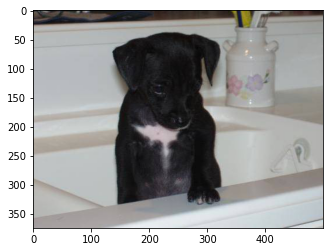

In [ ]:
# display dog image
img = mpimg.imread('/content/train/dog.8298.jpg')
imgplt = plt.imshow(img)
plt.show()

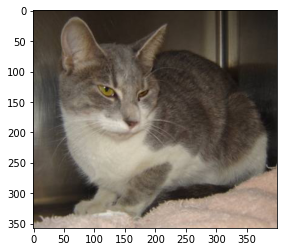

In [ ]:
# display cat image
img = mpimg.imread('/content/train/cat.4352.jpg')
imgplt = plt.imshow(img)
plt.show()

In [ ]:
file_names = os.listdir('/content/train/')

for i in range(5):

  name = file_names[i]
  print(name[0:3])



dog
cat
cat
cat
cat


In [ ]:
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


Resizing all the images

In [ ]:
#creating a directory for resized images
os.mkdir('/content/image resized')

In [ ]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

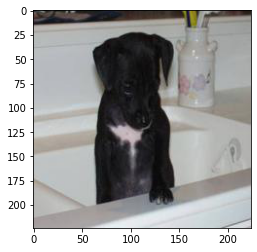

In [ ]:
# display resized dog image
img = mpimg.imread('/content/image resized/dog.8298.jpg')
imgplt = plt.imshow(img)
plt.show()

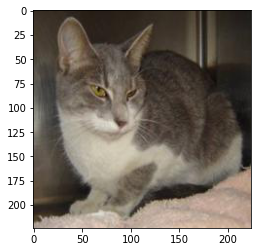

In [ ]:
# display resized cat image
img = mpimg.imread('/content/image resized/cat.4352.jpg')
imgplt = plt.imshow(img)
plt.show()

**Creating labels for resized images of dogs and cats**

Cat --> 0

Dog --> 1

In [ ]:
# creaing a for loop to assign labels
filenames = os.listdir('/content/image resized/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [ ]:
print(filenames[0:5])
print(len(filenames))

['dog.12067.jpg', 'cat.11189.jpg', 'cat.7561.jpg', 'cat.7760.jpg', 'cat.7076.jpg']
2000


In [ ]:
print(labels[0:5])
print(len(labels))

[1, 0, 0, 0, 0]
2000


In [ ]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[ 992 1008]


Converting all the resized images to numpy arrays

In [ ]:
import cv2
import glob

In [ ]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [ ]:
print(dog_cat_images)

[[[[ 79  93 142]
   [ 67  79 127]
   [ 77  87 135]
   ...
   [121 113 113]
   [130 117 119]
   [129 116 118]]

  [[ 43  54 106]
   [ 45  56 106]
   [ 72  79 128]
   ...
   [121 113 113]
   [131 119 119]
   [131 119 119]]

  [[ 64  71 126]
   [ 77  85 138]
   [103 110 160]
   ...
   [120 113 110]
   [131 119 117]
   [132 120 118]]

  ...

  [[ 73  79  98]
   [ 73  79  98]
   [ 76  82 101]
   ...
   [121  99  88]
   [115  93  81]
   [130 108  96]]

  [[ 59  65  84]
   [ 66  72  91]
   [ 80  86 105]
   ...
   [121 101  90]
   [134 115 102]
   [175 156 143]]

  [[ 84  90 109]
   [ 83  89 108]
   [ 83  89 108]
   ...
   [118  98  87]
   [149 130 117]
   [212 193 180]]]


 [[[  1 248 228]
   [ 13 255 237]
   [ 20 251 242]
   ...
   [  8 177 235]
   [  2 174 232]
   [  0 172 229]]

  [[ 12 254 236]
   [ 18 255 241]
   [ 20 248 241]
   ...
   [ 11 180 238]
   [  6 178 236]
   [  2 177 234]]

  [[ 24 253 244]
   [ 29 255 248]
   [ 25 245 245]
   ...
   [ 13 182 240]
   [  8 180 238]
   [  5 180

In [ ]:
type(dog_cat_images)

numpy.ndarray

In [ ]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [ ]:
X = dog_cat_images
Y = np.asarray(labels)

**Train Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600 --> training images

400 --> test images

In [ ]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
print(X_train_scaled)

[[[[0.75686275 0.9254902  0.88235294]
   [0.79215686 0.96078431 0.91764706]
   [0.77254902 0.95294118 0.90588235]
   ...
   [0.53333333 0.92156863 0.84313725]
   [0.50588235 0.90196078 0.81960784]
   [0.5372549  0.94117647 0.85882353]]

  [[0.75294118 0.94117647 0.89411765]
   [0.76862745 0.95686275 0.90980392]
   [0.76078431 0.94901961 0.90196078]
   ...
   [0.57647059 0.96470588 0.88627451]
   [0.49019608 0.88627451 0.80392157]
   [0.4627451  0.86666667 0.78431373]]

  [[0.6745098  0.88627451 0.83529412]
   [0.65882353 0.87843137 0.82745098]
   [0.6627451  0.88235294 0.83137255]
   ...
   [0.59215686 0.96862745 0.90196078]
   [0.50196078 0.89019608 0.81960784]
   [0.48627451 0.87843137 0.80784314]]

  ...

  [[0.50588235 0.88627451 0.78039216]
   [0.38431373 0.75686275 0.65098039]
   [0.39607843 0.74901961 0.65882353]
   ...
   [0.54117647 0.87058824 0.8       ]
   [0.57647059 0.87843137 0.82352941]
   [0.60784314 0.89019608 0.83921569]]

  [[0.49411765 0.88627451 0.77647059]
   [0.4

**Building the Neural Network**

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [ ]:
num_of_classes = 2

model = tf.keras.Sequential([

    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [ ]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 47s 861ms/step - loss: 0.2163 - acc: 0.9162
Epoch 2/5
50/50 [==============================] - 42s 838ms/step - loss: 0.0746 - acc: 0.9756
Epoch 3/5
50/50 [==============================] - 44s 872ms/step - loss: 0.0552 - acc: 0.9825
Epoch 4/5
50/50 [==============================] - 41s 824ms/step - loss: 0.0417 - acc: 0.9894
Epoch 5/5
50/50 [==============================] - 41s 825ms/step - loss: 0.0345 - acc: 0.9937


In [ ]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 12s 866ms/step - loss: 0.0812 - acc: 0.9775
Test Loss = 0.0812455490231514
Test Accuracy = 0.9775000214576721


**Predictive System**

Path of the image to be predicted: /content/dog.jpg


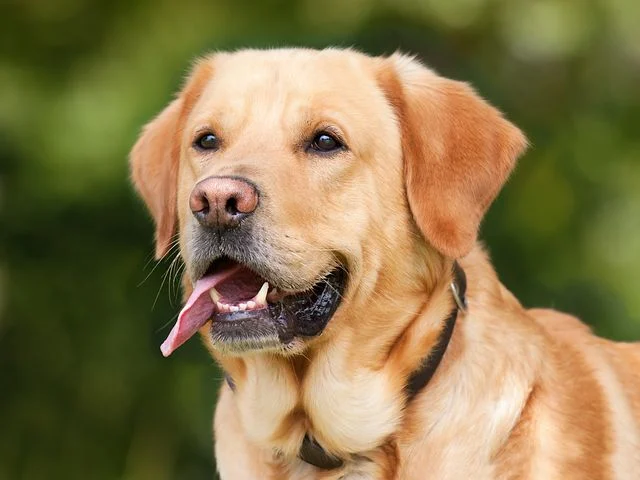

[[-4.6012597  3.784018 ]]
1
The image represents a Dog


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/cat.jpg


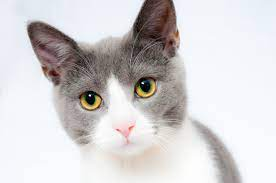

[[ 4.302739 -4.893738]]
0
The image represents a Cat


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')